# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).


## **CONCLUSION**
- **The customer with the highest number of orders comes from the United Kingdom (UK)**
- **The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below:
  United Kingdom
  Germany
  France
  Ireland (EIRE)
  Spain**
- **November 2011 has the highest sales , highest active customer and highest order placed but has the minmum avg revenue**
   - **The month with the lowest sales is undetermined as the dataset consists of transactions until 9th      December 2011 in December**
- **The most of the sales on afternoon & lowest sales on night**
- **There is almost 25% NA value present which is quite large and that would impact the result.**
- **We have a large percentage of cancelled orders of 39.98%**
    - **Top 5 country who cancelled orders are:
        United Kingdom    
        Germany            
        EIRE               
        France         
        USA** 
- **Finding that new customer are generating more revenue as compare to old (existing).**
- **Most people buy less than 25 items.**
- **Number one product is white hanging heart T-light holder.**
- **Not clear why there are FREE items given to certain customers
  On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011 &  dec 2011 full data is not available)**

## **Based on these results, here are some suggestion**
**1)Focus on top markets:** Since most of your orders come from the UK, Germany, France, Ireland (EIRE), and Spain, it might be a good idea to focus your marketing efforts on these markets.

**2)Improve customer retention:** Since new customers are generating more revenue than existing customers, it might be a good idea to focus on improving customer retention. This can be done by offering loyalty programs or personalized promotions.

**3)Reduce cancelled orders:** With a large percentage of cancelled orders, it might be a good idea to investigate why customers are cancelling their orders and take steps to reduce cancellations.

**4)Clarify free item policy:** Since it is not clear why certain customers are receiving free items, it might be a good idea to clarify your free item policy to ensure that all customers are treated fairly.

**Calling libraries and packages** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
sns.set(color_codes=True)

**Reading the dataset for data processing**

In [2]:
df_retail = pd.read_excel("Online Retail.xlsx",engine='openpyxl' )

**Displaying the dataset Online Retail.xlsx**

In [3]:
df_retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
df_retail.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Displaying dataset information by  displaying the dataset schema**

In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Displaying dataset shape and data type**

In [6]:
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df_retail.shape

(541909, 8)

**Displaying number of unique entries**


In [8]:
print("Number of transaction: ", df_retail['InvoiceNo'].nunique())
print("Number of products: ", df_retail['StockCode'].nunique())
print("Number of customers: ", df_retail['CustomerID'].nunique())
print("Number of countries: ", df_retail['Country'].nunique())

Number of transaction:  25900
Number of products:  4070
Number of customers:  4372
Number of countries:  38


**Checking null values in percentage**

In [9]:
print("Percentage of customers NA: ",round(df_retail['CustomerID'].isnull().sum() * 100 / len(df_retail),2),"%",sep="")

Percentage of customers NA: 24.93%


**For further analysis we have clear that 24.93% NA value first.**

In [10]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df_retail = df_retail.dropna(subset=['CustomerID'])
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Usualy 24.93% data means lots of data, but since there is no further info provided to null values so I drop them.**  

In [12]:
df_retail.shape

(406829, 8)

Our data set is composed of 541909 rows & 8 columns when going through the columns we notice that we have some missing values in the CustomerID columns as it only has 406829 values. Also the column Description has missing values and there is also some duplicate rows as well. So that should be considered when applying exploration to our data set. 

Note: The number of NA is  quite large and that would impact the result.

This dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction,*Nominal, a 6-digit integral number uniquely assugned to each transaction. If                  this code starts with 'c' it indicate cancellation.
- StockCode: Unique code of the product,*Nominal, 5-digit integral number uniquely assigned to each distinct product.
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer,*Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country where the transaction occurred

In [13]:
df_retail.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [14]:
df_retail.loc[df_retail.duplicated(subset=['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','Country'] ,keep = False),:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
df_retail.drop_duplicates(subset=['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','Country'] ,keep = 'first',inplace = True)

In [16]:
df_retail.shape

(401603, 8)

**Finding number of order cancelation**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: **-80995**. <br>
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [17]:
cancelled_orders = df_retail[df_retail['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom


In [18]:
cancelled_orders.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
cancelled_orders.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [20]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [21]:
print("We have ",len(cancelled_orders),"cancelled orders.")

We have  8872 cancelled orders.


In [22]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
total_orders = df_retail['InvoiceNo'].nunique()
can_num = len(cancelled_orders)
print(f'% of orders cancelled: {round((can_num*100/total_orders),2)}','%',sep="")

% of orders cancelled: 39.98%


Note: As we expected, negative values in the Quantity column, mean that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

We have a large percentage of cancelled orders of 39.98%. Studying these cancelled orders may help in preventing future cancellation.

**Rearrange columns**

In [24]:
df_retail = df_retail[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]
df_retail.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom


**Separate cancelled orders from the main data frame and make separate data frame for order of cancellations for separate  observations**

In [25]:
df = df_retail.copy()

In [26]:
df1 = df[~df.isin(cancelled_orders)].dropna()

**Adding a new column call 'Revenue'**

In [27]:
df['Revenue']=df['Quantity']*df['UnitPrice']

df = df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Revenue','Description','InvoiceDate','Country']]
df.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Revenue,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom


**Changing customerid to int**

In [28]:
df['CustomerID'] = df['CustomerID'].astype(np.int64)
df.dtypes

CustomerID              int64
InvoiceNo              object
StockCode              object
Quantity                int64
UnitPrice             float64
Revenue               float64
Description            object
InvoiceDate    datetime64[ns]
Country                object
dtype: object

**Seeing country wise quantity order and seeing the top 5 and bottom 5 countries by bar plot**

In [29]:
df_retail.Country = df_retail.Country.apply(lambda x: x.strip())

Country_stats = df_retail.groupby('Country')['Quantity'].agg('count').sort_values(ascending=False)
Country_stats.head()

Country
United Kingdom    356727
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: Quantity, dtype: int64

<Figure size 720x1800 with 0 Axes>

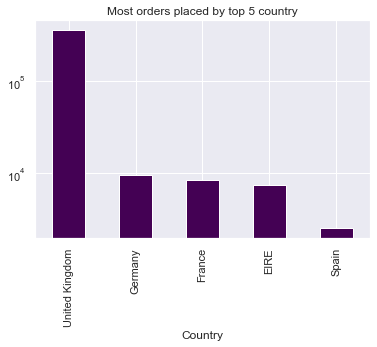

<Figure size 720x1800 with 0 Axes>

In [30]:
Country_stats[:5].plot(kind = 'bar', title = 'Most orders placed by top 5 country', colormap = 'viridis').set_yscale('log')
plt.figure(figsize=(10,25))

<Figure size 720x1800 with 0 Axes>

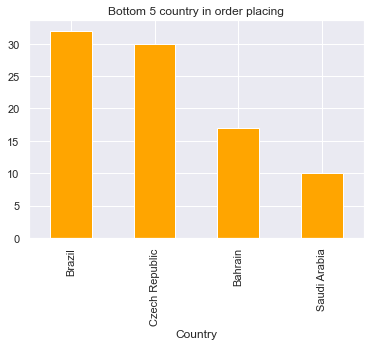

<Figure size 720x1800 with 0 Axes>

In [31]:
Country_stats[33:].plot(kind = 'bar', title = 'Bottom 5 country in order placing',color = 'orange')
plt.figure(figsize=(10,25))

**Now see the country wise canceled order**

In [32]:
Country_cancel = cancelled_orders.groupby('Country')['Quantity'].agg('count').sort_values(ascending=False)
Country_cancel.head()

Country
United Kingdom    7501
Germany            453
EIRE               247
France             148
USA                112
Name: Quantity, dtype: int64

<Figure size 720x1800 with 0 Axes>

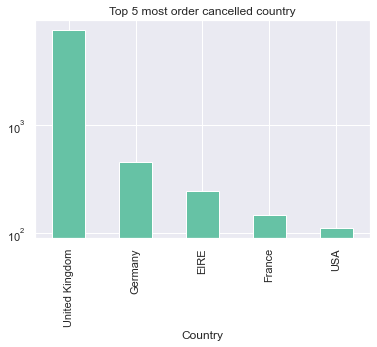

<Figure size 720x1800 with 0 Axes>

In [33]:
Country_cancel[:5].plot(kind = 'bar', title = 'Top 5 most order cancelled country', colormap = 'Set2').set_yscale('log')
plt.figure(figsize=(10,25))

In [34]:
percentage_cancellation = Country_cancel.divide(Country_stats).sort_values(ascending=False)
result = round(percentage_cancellation*100 , 2)

<Figure size 720x1800 with 0 Axes>

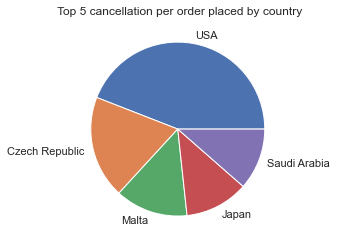

<Figure size 720x1800 with 0 Axes>

In [35]:
per_top5 = result.nlargest(5)
per_top5.plot(kind = 'pie',title = ' Top 5 cancellation per order placed by country')
plt.ylabel('')
plt.figure(figsize=(10,25))

**Adding year, month and time features**

In [36]:
year = df['InvoiceDate'].dt.year
df['Year'] = year

In [37]:
month = df['InvoiceDate'].dt.month
df['Month'] = month

In [38]:
date =  df['InvoiceDate'].dt.hour + df['InvoiceDate'].dt.minute/60 + df['InvoiceDate'].dt.second / 3600
week =  df['InvoiceDate'].dt.isocalendar().week
df['WeekNo'] = week
def time(date):
    if 5 <= date < 12:
        return 'Morning'
    elif 12 <= date < 17:
        return 'Afternoon'
    elif 17 <= date <20:
        return 'Evening'
    else:
        return 'Night'
    
df['Time'] = date.apply(time)

In [39]:
df['Date'] = df['InvoiceDate'].dt.date

In [40]:
df.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Revenue,Description,InvoiceDate,Country,Year,Month,WeekNo,Time,Date
0,17850,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01
1,17850,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01
2,17850,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01


**What's the average number of orders per customer?**

In [41]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [42]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer  is 5.


**Try to view all types of revenue and take a gilms of retention matrix**

In [43]:
df_revenue = df.groupby('Year')['Revenue'].sum().reset_index()
df_revenue

,Year,Revenue
0,2010,5.523729e+05
1,2011,7.726143e+06


In [44]:
df_monthly_revenue = df.groupby(['Month','Year'])['Revenue'].sum().reset_index()
df_monthly_revenue

,Month,Year,Revenue
0,1,2011,473731.900
1,2,2011,435534.070
2,3,2011,578576.210
3,4,2011,425222.671
4,5,2011,647011.670
5,6,2011,606862.520
6,7,2011,573112.321
7,8,2011,615078.090
8,9,2011,929352.332
9,10,2011,973306.380


In [45]:
df_monthly_revenue['RevenueRate'] = df_monthly_revenue['Revenue'].pct_change()
df_monthly_revenue

,Month,Year,Revenue,RevenueRate
0,1,2011,473731.900,NaN
1,2,2011,435534.070,-0.080632
2,3,2011,578576.210,0.328429
3,4,2011,425222.671,-0.265053
4,5,2011,647011.670,0.521583
5,6,2011,606862.520,-0.062053
6,7,2011,573112.321,-0.055614
7,8,2011,615078.090,0.073224
8,9,2011,929352.332,0.510950
9,10,2011,973306.380,0.047295


In [46]:
df_monthly_revenue = df_monthly_revenue.loc[df_monthly_revenue['Month'] != 12]

In [47]:
df_monthly_revenue['RevenueRate'] = df_monthly_revenue['RevenueRate'].fillna(0)

<ipython-input-47-b0a4e00c2745>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df_monthly_revenue

,Month,Year,Revenue,RevenueRate
0,1,2011,473731.900,0.000000
1,2,2011,435534.070,-0.080632
2,3,2011,578576.210,0.328429
3,4,2011,425222.671,-0.265053
4,5,2011,647011.670,0.521583
5,6,2011,606862.520,-0.062053
6,7,2011,573112.321,-0.055614
7,8,2011,615078.090,0.073224
8,9,2011,929352.332,0.510950
9,10,2011,973306.380,0.047295


<Figure size 720x1800 with 0 Axes>

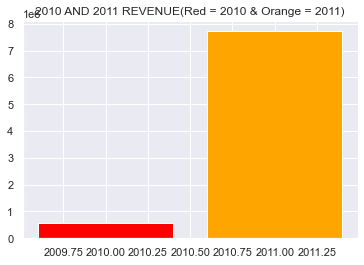

<Figure size 720x1800 with 0 Axes>

In [49]:
plt.bar( x = df_revenue['Year'], height = df_revenue['Revenue'], color =['red','orange'])
plt.title('2010 AND 2011 REVENUE(Red = 2010 & Orange = 2011)')
plt.figure(figsize=(10,25))

Text(0.5, 1.0, 'Monthly revenue rate ')

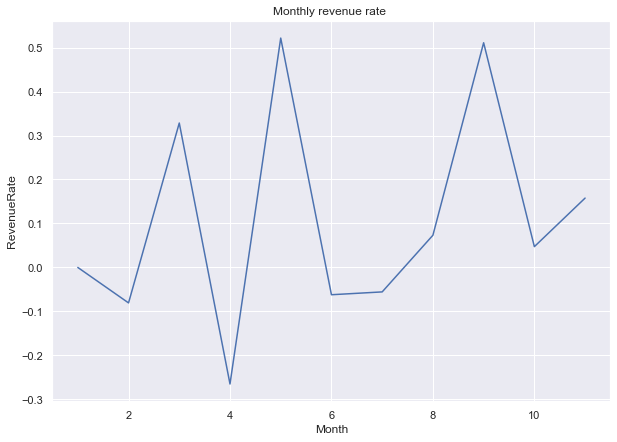

In [50]:
plt.subplots(figsize = (10,7))
sns.lineplot(x = 'Month', y = 'RevenueRate', data = df_monthly_revenue, sort =False)
plt.title('Monthly revenue rate ')

In [51]:
df_monthly_active =  df.groupby('Month')['CustomerID'].nunique().reset_index()
df_monthly_active

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


In [52]:
px.bar(data_frame = df_monthly_active, x ='Month', y ='CustomerID', title= 'Monthly Active Customers')

In [53]:
df_monthly_order =  df.groupby('Month')['InvoiceNo'].nunique().reset_index()
df_monthly_order

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


In [54]:
px.bar(data_frame=df_monthly_order,x='Month',y='InvoiceNo', title='Monthly Order' )

In [55]:
df_monthly_sale =  df.groupby('Month')['Quantity'].sum().reset_index()
df_monthly_sale

,Month,Quantity
0,1,268755
1,2,262243
2,3,343095
3,4,277730
4,5,367115
5,6,356239
6,7,361359
7,8,385865
8,9,536348
9,10,568898


In [56]:
px.bar(data_frame = df_monthly_sale, x = 'Month',y = 'Quantity',title='Monthly sales')

In [57]:
df_avg_revenue =  df.groupby('Month')['Revenue'].mean().reset_index()
df_avg_revenue

,Month,Revenue
0,1,21.861186
1,2,21.627474
2,3,21.026901
3,4,18.497593
4,5,22.574637
5,6,22.006909
6,7,21.027015
7,8,22.412115
8,9,22.970793
9,10,19.494199


In [58]:
px.bar(data_frame = df_avg_revenue,x='Month',y='Revenue',title='Monthly Avg Revenue')

In [59]:
df_country_revenue =  df.groupby('Country')['Revenue'].sum().reset_index()
df_country_revenue

,Country,Revenue
0,Australia,1.370098e+05
1,Austria,1.015432e+04
2,Bahrain,5.484000e+02
3,Belgium,4.091096e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.007639e+04
7,Cyprus,1.285876e+04
8,Czech Republic,7.077200e+02
9,Denmark,1.876814e+04


Text(0.5, 1.0, 'Country Wise Monthly Revenue')

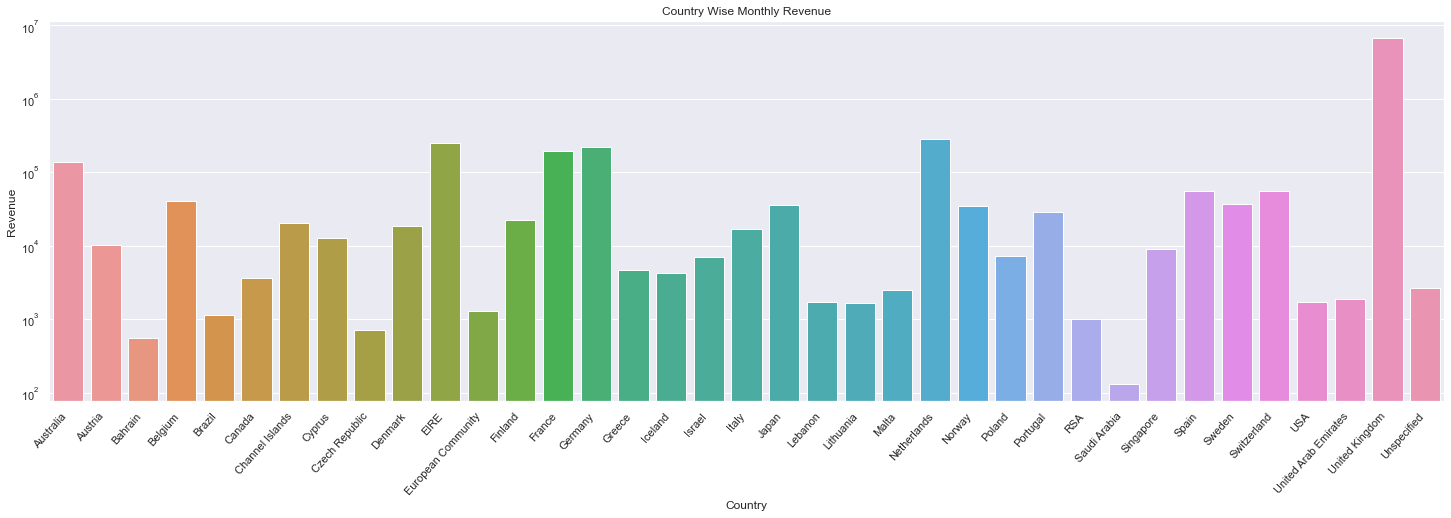

In [60]:
fig,ax = plt.subplots()
fig.set_size_inches(25,7)
ax = sns.barplot(x = 'Country' , y = 'Revenue', data = df_country_revenue , estimator=max, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=48,ha = 'right')
plt.yscale('log')
plt.title("Country Wise Monthly Revenue")

As we can see, the largest market is the one located in UK.

In [61]:
df[df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market. 

In [62]:
retail_uk = df[df['Country']=='United Kingdom']
retail_uk.describe()

,CustomerID,Quantity,UnitPrice,Revenue,Year,Month,WeekNo
count,356727.000000,356727.000000,356727.000000,356727.000000,356727.000000,356727.000000,356727.000000
mean,15543.797456,11.198670,3.268259,18.914050,2010.932601,7.626723,31.021980
std,1594.287926,264.998415,71.162430,455.157666,0.250712,3.418844,14.765284
min,12346.000000,-80995.000000,0.000000,-168469.600000,2010.000000,1.000000,1.000000
25%,14191.000000,2.000000,1.250000,3.900000,2011.000000,5.000000,19.000000
50%,15513.000000,4.000000,1.950000,10.200000,2011.000000,8.000000,35.000000
75%,16931.000000,12.000000,3.750000,17.700000,2011.000000,11.000000,44.000000
max,18287.000000,80995.000000,38970.000000,168469.600000,2011.000000,12.000000,51.000000


In [63]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  19857
Number of products bought:  3661
Number of customers: 3950
Number of countries:  1


**Finding new and old users**

In [64]:
df_min_date_buy = df.groupby('CustomerID').Date.min().reset_index()

In [65]:
df_min_date_buy 

,CustomerID,Date
0,12346,2011-01-18
1,12347,2010-12-07
2,12348,2010-12-16
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4367,18280,2011-03-07
4368,18281,2011-06-12
4369,18282,2011-08-05
4370,18283,2011-01-06


In [66]:
df_min_date_buy.columns = ['CustomerID','MinPurchaseDate']
df_min_date_buy['MinPurchesMonth'] = df_min_date_buy['MinPurchaseDate'].map(lambda date:date.month)
df_min_date_buy

,CustomerID,MinPurchaseDate,MinPurchesMonth
0,12346,2011-01-18,1
1,12347,2010-12-07,12
2,12348,2010-12-16,12
3,12349,2011-11-21,11
4,12350,2011-02-02,2
...,...,...,...
4367,18280,2011-03-07,3
4368,18281,2011-06-12,6
4369,18282,2011-08-05,8
4370,18283,2011-01-06,1


In [67]:
df = pd.merge(df, df_min_date_buy, on = 'CustomerID')
df.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Revenue,Description,InvoiceDate,Country,Year,Month,WeekNo,Time,Date,MinPurchaseDate,MinPurchesMonth
0,17850,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12
1,17850,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12
2,17850,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12


In [68]:
df['UserType'] = 'New'
df.loc[df['Month']>df['MinPurchesMonth'],'UserType'] ='Existing'
df.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Revenue,Description,InvoiceDate,Country,Year,Month,WeekNo,Time,Date,MinPurchaseDate,MinPurchesMonth,UserType
0,17850,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12,New
1,17850,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12,New
2,17850,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,48,Morning,2010-12-01,2010-12-01,12,New


In [69]:
df_usertype_revenue = df.groupby(['Month','UserType'])['Revenue'].sum().reset_index()
df_usertype_revenue.head(3)

,Month,UserType,Revenue
0,1,New,473731.90
1,2,Existing,56012.50
2,2,New,379521.57


Text(0.5, 1.0, 'Monthly Revenue by Usertypes')

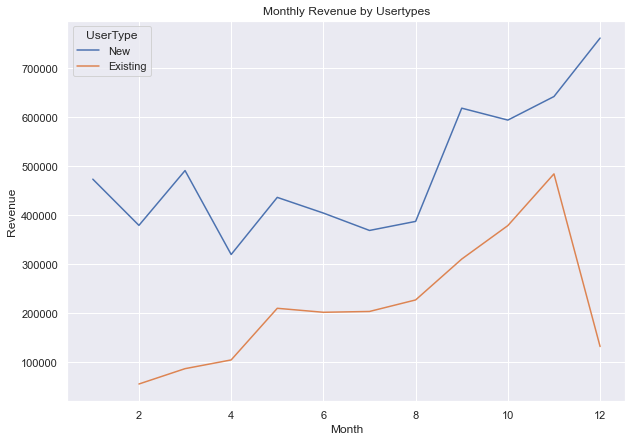

In [70]:
plt.subplots(figsize = (10,7))
sns.lineplot(data = df_usertype_revenue, x = 'Month' , y = 'Revenue' , hue = 'UserType' ,sort = False)
plt.title('Monthly Revenue by Usertypes')

**Above see the New and Existing customer generated revenue per month**

In [71]:
df_user_purches = df.groupby(['CustomerID','Month'])['Revenue'].sum().reset_index()
df_user_purches

,CustomerID,Month,Revenue
0,12346,1,0.00
1,12347,1,475.39
2,12347,4,636.25
3,12347,6,382.52
4,12347,8,584.91
...,...,...,...
13410,18283,10,112.99
13411,18283,11,637.71
13412,18283,12,208.00
13413,18287,5,765.28


In [72]:
df_user_retention = pd.crosstab(df_user_purches['CustomerID'],df_user_purches['Month']).reset_index()
df_user_retention

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346,1,0,0,0,0,0,0,0,0,0,0,0
1,12347,1,0,0,1,0,1,0,1,0,1,0,1
2,12348,1,0,0,1,0,0,0,0,1,0,0,1
3,12349,0,0,0,0,0,0,0,0,0,0,1,0
4,12350,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,1,0,0,0,0,0,0,0,0,0
4368,18281,0,0,0,0,0,1,0,0,0,0,0,0
4369,18282,0,0,0,0,0,0,0,1,0,0,0,1
4370,18283,1,1,0,1,1,1,1,0,1,1,1,1


**In above we just see the retention matrix for individual customer**

In [73]:
time_sales = df.groupby('Time')['Revenue'].sum().reset_index()
time_sales

,Time,Revenue
0,Afternoon,4.737714e+06
1,Evening,3.571273e+05
2,Morning,3.167754e+06
3,Night,1.592009e+04


<Figure size 720x504 with 0 Axes>

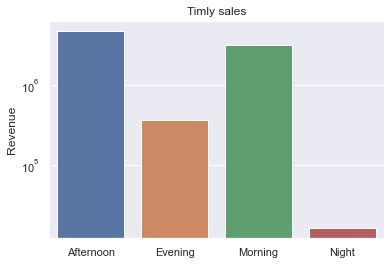

<Figure size 720x504 with 0 Axes>

In [74]:
sns.barplot(data = time_sales, x= 'Time',y='Revenue').set_yscale('log')
plt.title('Timly sales')
plt.xlabel("")
plt.ylabel("Revenue")
plt.figure(figsize=(10,7))

In [75]:
weekly_sales = df.groupby('WeekNo')['Revenue'].sum().reset_index()
weekly_sales.head()

,WeekNo,Revenue
0,1,108741.64
1,2,152005.52
2,3,96611.01
3,4,98843.01
4,5,103659.46


<Figure size 1800x504 with 0 Axes>

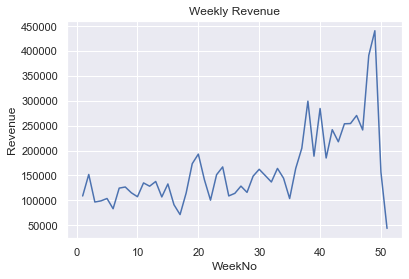

<Figure size 1800x504 with 0 Axes>

In [76]:
sns.lineplot(data = weekly_sales, x = 'WeekNo' , y ='Revenue')
plt.title('Weekly Revenue')
plt.figure(figsize = (25,7))

**We see every posibel revenue inside. In yearly sales 2010 is low compared to 2011.
But when I see the monthly_revenue it is now clear that why so. Because there is only data of 2010 i.e. December 2010. Now further Dec, 2011 sales and revenue all are in lower side as compaired to Nov,Sep,Oct.Country wise revenue is picture clear that more of the buisness depends on the UK.Further usertype revenue there is clear indication in April something went wrong.Then I view some glims of retention matrix.Time wise observation shows that most of the buying were done in afternoon then morning and evening and in night there is almost negligible buy. And weekly revenue data shows that there is drop in revenue around 18 week and also shows the down trend in december.**

**Try to see why in Dec, 2011 is low compare to others three in 2011**

In [77]:
df[df['Month'] == 12 ].Date.unique()

array([datetime.date(2010, 12, 1), datetime.date(2010, 12, 2),
       datetime.date(2011, 12, 7), datetime.date(2010, 12, 7),
       datetime.date(2010, 12, 8), datetime.date(2010, 12, 16),
       datetime.date(2010, 12, 17), datetime.date(2011, 12, 2),
       datetime.date(2010, 12, 3), datetime.date(2010, 12, 5),
       datetime.date(2010, 12, 9), datetime.date(2010, 12, 13),
       datetime.date(2010, 12, 14), datetime.date(2010, 12, 20),
       datetime.date(2010, 12, 23), datetime.date(2011, 12, 6),
       datetime.date(2011, 12, 9), datetime.date(2010, 12, 15),
       datetime.date(2011, 12, 1), datetime.date(2010, 12, 21),
       datetime.date(2011, 12, 5), datetime.date(2011, 12, 8),
       datetime.date(2010, 12, 10), datetime.date(2010, 12, 6),
       datetime.date(2011, 12, 4), datetime.date(2010, 12, 22),
       datetime.date(2010, 12, 19), datetime.date(2010, 12, 12)],
      dtype=object)

**Now it is clear that for Dec 2011 the data only entry upto 9/12/2011, that's why it's show low.**

**What's the average number of unique items per order?**

In [78]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [79]:
groupby_invoice.describe()

,productsNumber
count,22190.000000
mean,17.876566
std,22.872614
min,1.000000
25%,3.000000
50%,12.000000
75%,24.000000
max,541.000000


In [80]:
df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [81]:
temp_df = df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850,7
1,536366,17850,2
2,536367,13047,12
3,536368,13047,4
4,536369,13047,1


In [82]:
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.098378
std,1733.149624,23.363167
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


C:\Users\DEBTANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



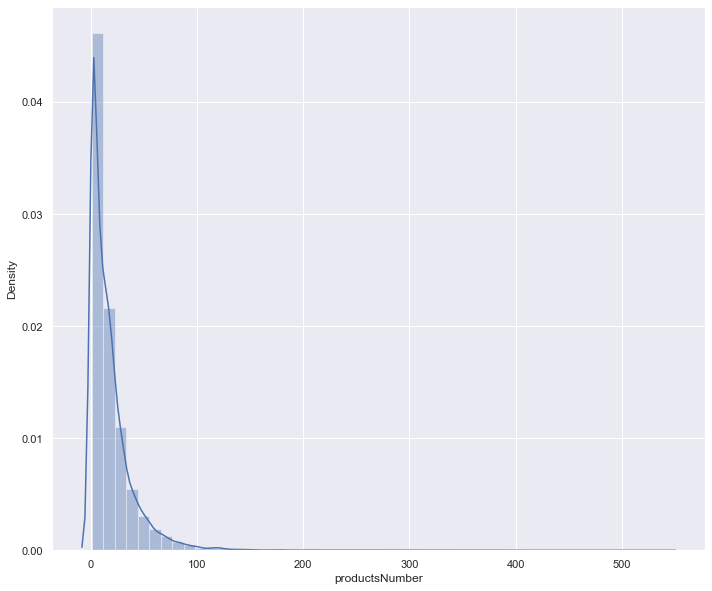

In [83]:
#Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()

**We have a skewed distribution of products.** Most people buy less than 25 items.

**Product wise top 10  order placed products**

In [84]:
top_10 =df['Description'].value_counts().sort_values(ascending=False).head(10)
px.bar(top_10,x=top_10.index,y = top_10.values,color = top_10.index ).update_layout(yaxis_title=None,xaxis_title= None)

**What are the products that are most bought in UK?**

In [85]:
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)
#check how to show product description instead of StockCode

,StockCode,Quantity
2501,84077,47886
1017,22197,45194
3349,85099B,40777
2605,84879,32580
3355,85123A,32136
1398,22616,24297
37,17003,22672
352,21212,22182
998,22178,21427
840,21977,19882


In [86]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
16623,581483,80995
1746,541431,74215
11184,567423,12572
15579,578841,12540
9338,562439,11848


**Checking some outlier by plotting box plot and pair plot to see some correlation**

In [87]:
correlation_coef = df.corr() 
correlation_coef

,CustomerID,Quantity,UnitPrice,Revenue,Year,Month,WeekNo,MinPurchesMonth
CustomerID,1.000000,-0.003457,-0.004524,-0.002130,-0.035279,0.029856,0.029489,0.058754
Quantity,-0.003457,1.000000,-0.001243,0.916130,0.001041,-0.002354,-0.002306,0.004904
UnitPrice,-0.004524,-0.001243,1.000000,-0.129311,0.000978,-0.003140,-0.003286,-0.001457
Revenue,-0.002130,0.916130,-0.129311,1.000000,-0.000213,-0.001811,-0.001802,0.005364
Year,-0.035279,0.001041,0.000978,-0.000213,1.000000,-0.341560,-0.327386,-0.249528
Month,0.029856,-0.002354,-0.003140,-0.001811,-0.341560,1.000000,0.996308,0.226341
WeekNo,0.029489,-0.002306,-0.003286,-0.001802,-0.327386,0.996308,1.000000,0.223100
MinPurchesMonth,0.058754,0.004904,-0.001457,0.005364,-0.249528,0.226341,0.223100,1.000000


In [88]:
df_monthly_revenue_quantity = df.groupby('Month')['Quantity','Revenue'].sum().reset_index()
df_monthly_revenue_quantity

<ipython-input-88-653a933908c2>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Month,Quantity,Revenue
0,1,268755,473731.900
1,2,262243,435534.070
2,3,343095,578576.210
3,4,277730,425222.671
4,5,367115,647011.670
5,6,356239,606862.520
6,7,361359,573112.321
7,8,385865,615078.090
8,9,536348,929352.332
9,10,568898,973306.380


In [89]:
correlations = df_monthly_revenue_quantity.corr()
correlations

,Month,Quantity,Revenue
Month,1.000000,0.881627,0.869343
Quantity,0.881627,1.000000,0.993196
Revenue,0.869343,0.993196,1.000000


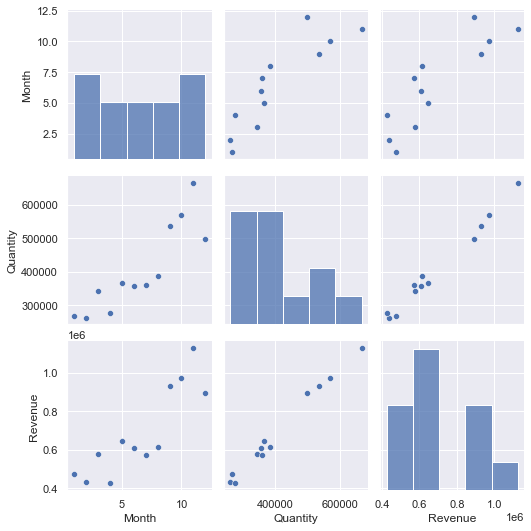

In [90]:
sns.pairplot(df_monthly_revenue_quantity[['Month','Quantity','Revenue']])

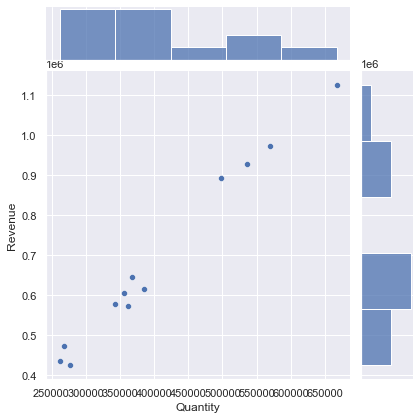

In [91]:

sns.jointplot(x = df_monthly_revenue_quantity['Quantity'] , y = df_monthly_revenue_quantity['Revenue'] )

<AxesSubplot:xlabel='Quantity'>

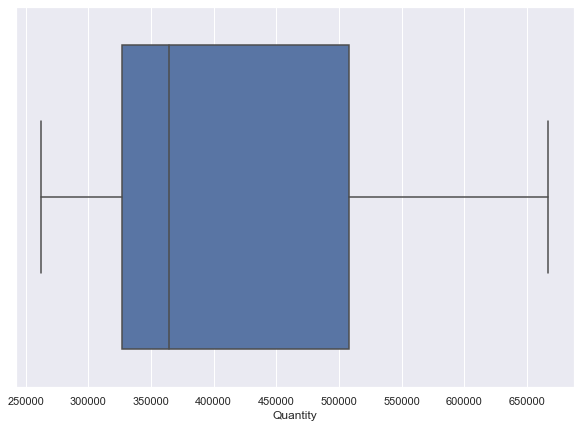

In [92]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df_monthly_revenue_quantity,x='Quantity')

<AxesSubplot:xlabel='Revenue'>

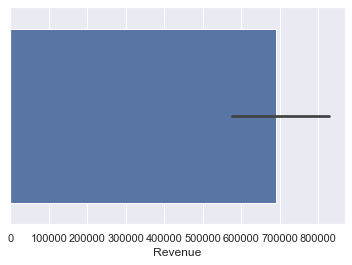

In [93]:
sns.barplot(data = df_monthly_revenue_quantity , x='Revenue')

**Vewing the quartile range**

In [94]:
upper = round(df_monthly_revenue_quantity.Quantity.mean()+3*df_monthly_revenue_quantity.Quantity.std(),2)
upper

798207.29

In [95]:
lower = round(abs( df_monthly_revenue_quantity.Quantity.mean()-3*df_monthly_revenue_quantity.Quantity.std()),2)
lower

17267.54

In [96]:
df_monthly_revenue_quantity.describe()

,Month,Quantity,Revenue
count,12.000000,12.000000,1.200000e+01
mean,6.500000,407737.416667,6.898763e+05
std,3.605551,130156.625525,2.319919e+05
min,1.000000,262243.000000,4.252227e+05
25%,3.750000,326753.750000,5.482672e+05
50%,6.500000,364237.000000,6.109703e+05
75%,9.250000,507878.750000,9.027723e+05
max,12.000000,666813.000000,1.126815e+06


**The quartile range is [17267.54 , 7982707.29]**

**Discover patterns for Unit Price**

In [97]:
df.UnitPrice.describe()

count    401603.000000
mean          3.474067
std          69.764122
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

C:\Users\DEBTANU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='UnitPrice'>

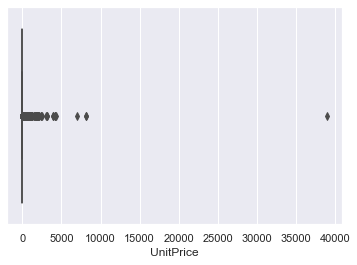

In [98]:
sns.boxplot(df['UnitPrice'])

In [99]:
df_free = df[df.UnitPrice == 0]
df_free.head(3)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Revenue,Description,InvoiceDate,Country,Year,Month,WeekNo,Time,Date,MinPurchaseDate,MinPurchesMonth,UserType
5449,12431,574469,22385,12,0.0,0.0,JUMBO BAG SPACEBOY DESIGN,2011-11-04 11:55:00,Australia,2011,11,44,Morning,2011-11-04,2010-12-01,12,New
13558,12748,568384,M,1,0.0,0.0,Manual,2011-09-27 09:46:00,United Kingdom,2011,9,39,Morning,2011-09-27,2010-12-01,12,New
17674,14911,539722,22423,10,0.0,0.0,REGENCY CAKESTAND 3 TIER,2010-12-21 13:45:00,EIRE,2010,12,51,Afternoon,2010-12-21,2010-12-01,12,New


In [100]:
df_free.Month.value_counts().sort_index()

1      3
2      1
3      2
4      2
5      2
7      2
8      6
9      2
10     3
11    14
12     3
Name: Month, dtype: int64

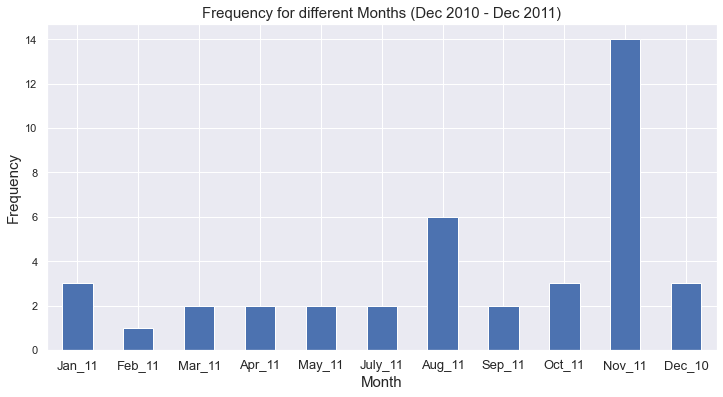

In [101]:
ax = df_free.Month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_10'), rotation='horizontal', fontsize=13)
plt.show()

**We see that there are unit price = 0 (FREE items)
There are some free items given to customers from time to time**